In [1]:
import torch
import torch.nn.functional as F

In [2]:
z = torch.FloatTensor([1,2,3])

In [3]:
hypothesis = F.softmax(z,dim=0)
hypothesis

tensor([0.0900, 0.2447, 0.6652])

# 소프트맥스 함수의 기본식

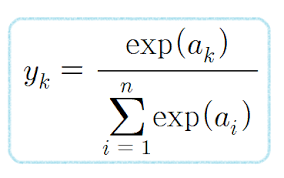

- 결과를 비율로 확인시켜주기 위해서 한다.
- 등간격이었던 것을 변환시켜 큰 수를 강조시켜준다.

In [4]:
import numpy as np
np.exp(1.0)/(np.exp(1.0)+np.exp(2.0)+np.exp(3.0))

0.09003057317038046

In [5]:
np.exp(2.0)/(np.exp(1.0)+np.exp(2.0)+np.exp(3.0))

0.24472847105479767

In [6]:
np.exp(3.0)/(np.exp(1.0)+np.exp(2.0)+np.exp(3.0))

0.6652409557748219

In [7]:
hypothesis.sum()

tensor(1.)

# MNIST

In [8]:
!pip install torchvision

In [9]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [10]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                         train = True,
                         transform = transforms.ToTensor(),
                         download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train = False,
                         transform = transforms.ToTensor(),
                         download=True)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [11]:
training_epochs = 15
batch_size=100
data_loader =torch.utils.data.DataLoader(dataset=mnist_train,
                                        batch_size=batch_size,
                                        shuffle=True,drop_last=True)

In [12]:
mnist_train[0]  # 1이 넘지 않는 이유는 mnist데이터 자체가 글씨가 적혀있는 부분에 픽셀값이 조금 적혀있는 것 뿐이다.

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [13]:
image,label = mnist_train[0]
print(image.shape,label)    # 숫자 5

torch.Size([1, 28, 28]) 5


In [14]:
image,label = mnist_train[4]
print(image.shape,label)   # 숫자 9

torch.Size([1, 28, 28]) 9


In [15]:
import matplotlib.pyplot as plt
import numpy as np
#plt.imshow(image.reshape(28,28),cmap='gray')

In [18]:
import torch.nn as nn
linear = nn.Linear(28*28,10,bias=True)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(linear.parameters(),lr=0.1)

In [21]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, y in data_loader:
        X = X.view(-1,28*28)
        y = y
        
        hypothesis = linear(X)
        cost = criterion(hypothesis,y)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        avg_cost += cost/total_batch
    print('Epoch:','%04d' %(epoch+1), 'cost=',"{:.9f}".format(avg_cost))

Epoch: 0001 cost= 0.533649504
Epoch: 0002 cost= 0.358642191
Epoch: 0003 cost= 0.330779225
Epoch: 0004 cost= 0.316260189
Epoch: 0005 cost= 0.306741118
Epoch: 0006 cost= 0.300162941
Epoch: 0007 cost= 0.294817328
Epoch: 0008 cost= 0.290684044
Epoch: 0009 cost= 0.287285656
Epoch: 0010 cost= 0.284258753
Epoch: 0011 cost= 0.281809658
Epoch: 0012 cost= 0.279576480
Epoch: 0013 cost= 0.277836144
Epoch: 0014 cost= 0.275776446
Epoch: 0015 cost= 0.274397761


In [29]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28*28).float()
    y_test = mnist_test.test_labels
    
    prediction = linear(X_test)
    
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print("acc:",accuracy.item())
    r = random.randint(0, len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float()
    y_single_data = mnist_test.test_labels[r:r+1]
    print('Label:', y_single_data.item())
    single_prediction = linear(X_single_data)
    print("Prediction:",torch.argmax(single_prediction,1).item())
    
#     plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys',
#               interpolation='nearest')
#     plt.show()

acc: 0.8853999972343445
Label: 0
Prediction: 0


In [30]:
# Neural Network - Deep learning

In [31]:
# layering
# nn.Linear(784,10)
# 784 -> 256 -> 256 -> 10
linear1 = nn.Linear(784, 256, bias = True) 
linear2 = nn.Linear(256, 256, bias = True) 
linear3 = nn.Linear(256, 10, bias = True) 
relu = torch.nn.ReLU()

# 원래있던 가중치 값들을 초기화시킨다.

In [32]:
nn.init.normal_(linear1.weight)
nn.init.normal_(linear2.weight)
nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[ 1.4532,  0.0426, -0.1924,  ...,  0.2653,  1.8749, -0.4891],
        [-0.5162,  0.9899, -0.0371,  ..., -0.9141,  0.8605,  1.3177],
        [-0.2321,  0.4208, -0.0357,  ...,  1.2380,  1.2624,  0.8687],
        ...,
        [ 0.2614, -1.3365, -1.0296,  ...,  1.9548,  0.0199,  0.4355],
        [ 0.2079,  0.9302,  0.2193,  ..., -1.2185, -1.8700,  1.4883],
        [-0.2885, -0.0591, -0.8583,  ...,  0.0469,  0.3351, -0.0851]],
       requires_grad=True)

# relu는 신경 전달해주는 함수이기에 중간 중간에 다른 함수들을 이어준다.
# 또한 relu는 이미지 처리할 때 많이 사용한다.

In [34]:
model = nn.Sequential(linear1,relu,linear2,relu,linear3)

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
total_batch = len(data_loader)
train_epochs = 15
batch_size = 100
for epoch in range(train_epochs):
    avg_cost = 0
    for X,y in data_loader:
        X=X.view(-1,28*28)
        y=y
        optimizer.zero_grad()
        hyp = model(X)
        cost = criterion(hyp, y)
        cost.backward()
        optimizer.step()
        avg_cost+=cost/total_batch
    print('Epoch:',"%04d"%(epoch+1),'cost=','{:0.9f}'.format(avg_cost))
print("End")

Epoch: 0001 cost= 144.973587036
Epoch: 0002 cost= 34.748874664
Epoch: 0003 cost= 21.564258575
Epoch: 0004 cost= 15.020461082
Epoch: 0005 cost= 10.708985329
Epoch: 0006 cost= 7.678145409
Epoch: 0007 cost= 5.535806179
Epoch: 0008 cost= 4.031185627
Epoch: 0009 cost= 3.030933857
Epoch: 0010 cost= 2.178589582
Epoch: 0011 cost= 1.650301099
Epoch: 0012 cost= 1.132889748
Epoch: 0013 cost= 0.930800200
Epoch: 0014 cost= 0.795090318
Epoch: 0015 cost= 0.580806315
End


In [59]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1,28*28).float()
    y_test = mnist_test.test_labels
    
    prediction = linear(X_test)
    
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()
    print("acc:",accuracy.item())
    r = random.randint(0, len(mnist_test)-1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float()
    y_single_data = mnist_test.test_labels[r:r+1]
    print('Label:', y_single_data.item())
    single_prediction = linear(X_single_data)
    print("Prediction:",torch.argmax(single_prediction,1).item())
    
#     plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys',
#               interpolation='nearest')
#     plt.show()

acc: 0.8853999972343445
Label: 9
Prediction: 9
